# Check Swadesh quality

In [2]:
import numpy as np
import os
import json
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [3]:
num = 110
# num = 207
swad_ex_idx = []
dirname = '/home/eszti/data/panlex_swadesh/swadesh' + str(num)
not_found_list = np.zeros(num)
no_one_word_list = np.zeros(num)

fbcodes_fn = '/home/eszti/projects/dipterv/univ_embedding/res/fb2silcodes.json'
with open(fbcodes_fn) as f:
    fb2sil = json.load(f)
    
wikicodes_fn = '/home/eszti/projects/dipterv/univ_embedding/res/wikicodes.json'
with open(wikicodes_fn) as f:
    wikicodes = json.load(f)

lang_codes = set()

for fn in os.listdir(dirname):
    if fn.endswith(".txt"):
        code = fn.split('-')[0]
#         if code not in fb2sil.values():
#             continue
#         print(code)
        if code in lang_codes:
#             print('{0} is already in the set'.format(code))
            continue
        lang_codes.add(code)       
        with open(os.path.join(dirname, fn)) as f:
            i = 0
            for line in f:
                if i in swad_ex_idx:
                    not_found_list[i] = -1
                    no_one_word_list[i] = -1
                    i += 1
                    continue
                fields = line.strip().decode('utf-8').split('\t')
                if len(fields) == 1 and fields[0] == '':
                    if code in fb2sil.values():
                        not_found_list[i] += 1
                else:
                    found = False
                    for w in fields:
                        if ' ' not in w:
                            found = True
                            break
                    if not found:
                        if code in fb2sil.values():
#                         print(fields)
                            no_one_word_list[i] += 1
                i += 1

Statistics:   
note: 6 wikitionary codes are discarded as there's no sil translation for them (wikicode to sil translation are only accessible, for the time being at least, if there's a corresponding fb embedding to them)

#fb sil codes: 89
#swadesh sil codes: 1772
#wiki sil codes: 48

6 wikicodes are not found among facebook codes:
set([u'cmn', u'io', u'oc', u'sw', u'li', u'ku'])

24 facebook codes are not found among swadesh lists:
set([u'vol', u'scc', u'ara', u'msa', u'lav', u'scr', u'est', u'new', u'sin', u'pan', u'mar', u'fas', u'sqi', u'uzb', u'vls', u'nor', u'urd', u'mlg', u'guj', u'aze', u'war', u'nep', u'zho', u'mon'])

common languages number: 37
set([u'ron', u'jpn', u'por', u'ita', u'pol', u'rus', u'ind', u'spa', u'glg', u'fra', u'mkd', u'ell', u'eng', u'tur', u'vie', u'swe', u'ukr', u'lit', u'heb', u'kor', u'fin', u'hun', u'eus', u'dan', u'slk', u'ces', u'bul', u'kat', u'lat', u'kaz', u'hin', u'slv', u'deu', u'cat', u'epo', u'isl', u'tha'])


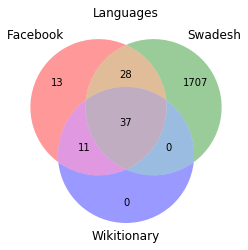

In [4]:
swad_sil_set = set(lang_codes)
wiki_sil_set = set([fb2sil[x] for x in wikicodes if x in fb2sil.keys()])
fb_sil_set = set(fb2sil.values())

print '#fb sil codes: {}'.format(len(fb_sil_set))
print '#swadesh sil codes: {}'.format(len(swad_sil_set))
print '#wiki sil codes: {}'.format(len(wiki_sil_set))

diff1 = set([x for x in wikicodes if x not in fb2sil.keys()])
print '\n{} wikicodes are not found among facebook codes:'.format(len(diff1))
print diff1
diff2 = fb_sil_set - swad_sil_set
print '\n{} facebook codes are not found among swadesh lists:'.format(len(diff2))
print diff2

inters = swad_sil_set & wiki_sil_set & fb_sil_set
print '\ncommon languages number: ' + str(len(inters))
print inters

s_7 = len(inters)
s_1 = len(fb_sil_set - swad_sil_set - wiki_sil_set)
s_2 = len(swad_sil_set - fb_sil_set - wiki_sil_set)
s_3 = len(fb_sil_set & swad_sil_set) - s_7
s_4 = len(wiki_sil_set - fb_sil_set - swad_sil_set)
s_5 = len(fb_sil_set & wiki_sil_set) - s_7
s_6 = len(swad_sil_set & wiki_sil_set) - s_7

plt.figure(figsize=(4,4))
v = venn3(subsets=(1, 1, 1, 1, 1, 1, 1), set_labels = ('Facebook', 'Swadesh', 'Wikitionary'))
v.get_label_by_id('100').set_text(str(s_1))
v.get_label_by_id('010').set_text(str(s_2))
v.get_label_by_id('110').set_text(str(s_3))
v.get_label_by_id('001').set_text(str(s_4))
v.get_label_by_id('101').set_text(s_5)
v.get_label_by_id('011').set_text(s_6)
v.get_label_by_id('111').set_text(str(s_7))
plt.title("Languages")
plt.show()

This list shows in case of how many languages there was found no entry at each position

In [5]:
not_found_list

array([  0.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        52.,  31.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         0.,   0.,   0.,  49.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
         0.,   0.,   0.,  17.,   0.,   0.,   1.,   2.,   1.,   0.,   2.,
         0.,   0.,  28.,   1.,   1.,   0.,   0.,   1.,  30.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.,   2.,   4.,   0.,   0.,   0.,   0.,
         1.,   0.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,  49.,   0.,   0.,   1.,   0.,   0.,   3.,   3.,   0.,   0.,
         0.,   2.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   2.,   0.,
         0.,   1.,   1.,   1.,   1.,   2.,   2.,   1.,   1.,   1.,   1.])

This list shows in case of how many languages there was no entry without a space in it

In [6]:
no_one_word_list

array([ 1.,  0.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        3.,  0.,  0.,  1.,  2.,  0.,  3.,  3.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.])

In [7]:
swad_fb_fn = '/home/eszti/projects/dipterv/univ_embedding/res/swad_fb{}.json'.format(num)
swad_fb_wiki_fn = '/home/eszti/projects/dipterv/univ_embedding/res/swad_fb_wiki{}.json'.format(num)

swad_fb_set = swad_sil_set & fb_sil_set
swad_fb_wiki_set = swad_fb_set & wiki_sil_set

print(len(swad_fb_set))
print(len(swad_fb_wiki_set))
print(swad_fb_set)
print(swad_fb_wiki_set)

with open(swad_fb_fn, 'w') as f:
    json.dump(list(swad_fb_set), f)
    
with open(swad_fb_wiki_fn, 'w') as f:
    json.dump(list(swad_fb_wiki_set), f)

65
37
set([u'tat', u'sco', u'tel', u'san', u'ron', u'vie', u'por', u'hun', u'ita', u'mya', u'pol', u'khm', u'spa', u'ind', u'tgk', u'bre', u'cat', u'tgl', u'fra', u'mkd', u'che', u'ell', u'min', u'jpn', u'swe', u'ukr', u'lit', u'cym', u'chv', u'fry', u'kor', u'fin', u'tur', u'eus', u'tam', u'ceb', u'ast', u'kir', u'dan', u'slk', u'kan', u'heb', u'ces', u'bul', u'kat', u'lat', u'rus', u'rup', u'mal', u'hin', u'ben', u'bel', u'ltz', u'slv', u'bos', u'deu', u'glg', u'epo', u'eng', u'afr', u'isl', u'tha', u'kaz', u'bak', u'hbs'])
set([u'dan', u'ron', u'vie', u'por', u'ita', u'pol', u'kaz', u'ind', u'spa', u'cat', u'fra', u'mkd', u'ell', u'eng', u'jpn', u'swe', u'ukr', u'lit', u'heb', u'kor', u'fin', u'hun', u'eus', u'tur', u'isl', u'ces', u'bul', u'kat', u'lat', u'rus', u'hin', u'slv', u'deu', u'glg', u'epo', u'slk', u'tha'])
